In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("ncr_ride_bookings.csv")

In [3]:
df.head(3)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [5]:
df.shape

(150000, 21)

In [6]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [7]:
df.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

In [8]:
missing_data = df.isnull().mean()

missing_data[missing_data>0].sort_values(ascending=False)

Incomplete Rides                     0.94
Incomplete Rides Reason              0.94
Cancelled Rides by Customer          0.93
Reason for cancelling by Customer    0.93
Cancelled Rides by Driver            0.82
Driver Cancellation Reason           0.82
Driver Ratings                       0.38
Customer Rating                      0.38
Avg CTAT                             0.32
Ride Distance                        0.32
Booking Value                        0.32
Payment Method                       0.32
Avg VTAT                             0.07
dtype: float64

In [9]:

df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

In [10]:
print((df["Booking Status"].unique()))
print(df["Booking Status"].value_counts())


['No Driver Found' 'Incomplete' 'Completed' 'Cancelled by Driver'
 'Cancelled by Customer']
Booking Status
Completed                93000
Cancelled by Driver      27000
No Driver Found          10500
Cancelled by Customer    10500
Incomplete                9000
Name: count, dtype: int64


In [11]:
df.select_dtypes(include='number').columns

Index(['Avg VTAT', 'Avg CTAT', 'Cancelled Rides by Customer',
       'Cancelled Rides by Driver', 'Incomplete Rides', 'Booking Value',
       'Ride Distance', 'Driver Ratings', 'Customer Rating'],
      dtype='object')

In [12]:
def clean_ready_dataset(df):
    df_clean = df.copy()
    df_clean["Date"] = pd.to_datetime(df_clean["Date"])
    df_clean["DateTime"] = pd.to_datetime(df_clean["Date"].astype(str) + ' ' + df_clean["Time"].astype(str))
    df_clean["Hours"] = df_clean["DateTime"].dt.hour
    df_clean["Day"] = df_clean["DateTime"].dt.day_name()
    df_clean["Month"] = df_clean["DateTime"].dt.month
    df_clean["Weekend"] = df_clean["DateTime"].dt.weekday >= 5
    
    numeric_cols = ['Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating']
    for numeric in numeric_cols:
        df_clean[numeric] = pd.to_numeric(df_clean[numeric],errors="coerce")
    
    df_clean["Successful"] = df_clean["Booking Status"] == "Completed"
    df_clean["Cancelled_Customer"] = df_clean["Cancelled Rides by Customer"].notna()
    df_clean["Cancelled_Driver"] = df_clean["Cancelled Rides by Driver"].notna()
    
    def categorize_status(status):
        if status == 'Completed':
            return 'Completed'
        elif 'Cancelled' in str(status):
            return 'Cancelled'
        elif status == 'No Driver Found':
            return 'No Driver Found'
        else:
            return 'Other'
        
    df_clean["Status Category"] = df_clean["Booking Status"].apply(categorize_status)
    
    return df_clean
df = clean_ready_dataset(df)


In [13]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Payment Method,DateTime,Hours,Day,Month,Weekend,Successful,Cancelled_Customer,Cancelled_Driver,Status Category
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,2024-03-23 12:29:38,12,Saturday,3,True,False,False,False,No Driver Found
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,UPI,2024-11-29 18:01:39,18,Friday,11,False,False,False,False,Other
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,Debit Card,2024-08-23 08:56:10,8,Friday,8,False,True,False,False,Completed
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,UPI,2024-10-21 17:17:25,17,Monday,10,False,True,False,False,Completed
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,UPI,2024-09-16 22:08:00,22,Monday,9,False,True,False,False,Completed


In [14]:
def create_executive_summary(df):
    """Generate key business metrics"""
    
    total_rides = len(df)
    successful_rides = df['Successful'].sum()
    success_rate = (successful_rides / total_rides) * 100
    
    total_revenue = df[df['Successful']]['Booking Value'].sum()
    avg_ride_value = df[df['Successful']]['Booking Value'].mean()
    
    avg_distance = df[df['Successful']]['Ride Distance'].mean()
    avg_driver_rating = df[df['Successful']]['Driver Ratings'].mean()
    avg_customer_rating = df[df['Successful']]['Customer Rating'].mean()
    
    # Cancellation analysis
    customer_cancellations = df['Cancelled_Customer'].sum()
    driver_cancellations = df['Cancelled_Driver'].sum()
    
    return {
        'total_rides': total_rides,
        'successful_rides': successful_rides,
        'success_rate': success_rate,
        'total_revenue': total_revenue,
        'avg_ride_value': avg_ride_value,
        'avg_distance': avg_distance,
        'avg_driver_rating': avg_driver_rating,
        'avg_customer_rating': avg_customer_rating,
        'customer_cancellations': customer_cancellations,
        'driver_cancellations': driver_cancellations
    }

# Get our key metrics
metrics = create_executive_summary(df)

print("🎯 EXECUTIVE SUMMARY")
print("=" * 50)
print(f" Total Rides Analyzed: {metrics['total_rides']:,}")
print(f" Successful Rides: {metrics['successful_rides']:,}")
print(f" Success Rate: {metrics['success_rate']:.1f}%")
print(f" Total Revenue: ₹{metrics['total_revenue']:,.0f}")
print(f" Average Ride Value: ₹{metrics['avg_ride_value']:.0f}")
print(f" Average Distance: {metrics['avg_distance']:.1f} km")
print(f" Avg Driver Rating: {metrics['avg_driver_rating']:.2f}/5")
print(f" Avg Customer Rating: {metrics['avg_customer_rating']:.2f}/5")
print(f" Customer Cancellations: {metrics['customer_cancellations']:,}")
print(f" Driver Cancellations: {metrics['driver_cancellations']:,}")

🎯 EXECUTIVE SUMMARY
 Total Rides Analyzed: 150,000
 Successful Rides: 93,000
 Success Rate: 62.0%
 Total Revenue: ₹47,260,574
 Average Ride Value: ₹508
 Average Distance: 26.0 km
 Avg Driver Rating: 4.23/5
 Avg Customer Rating: 4.40/5
 Customer Cancellations: 10,500
 Driver Cancellations: 27,000


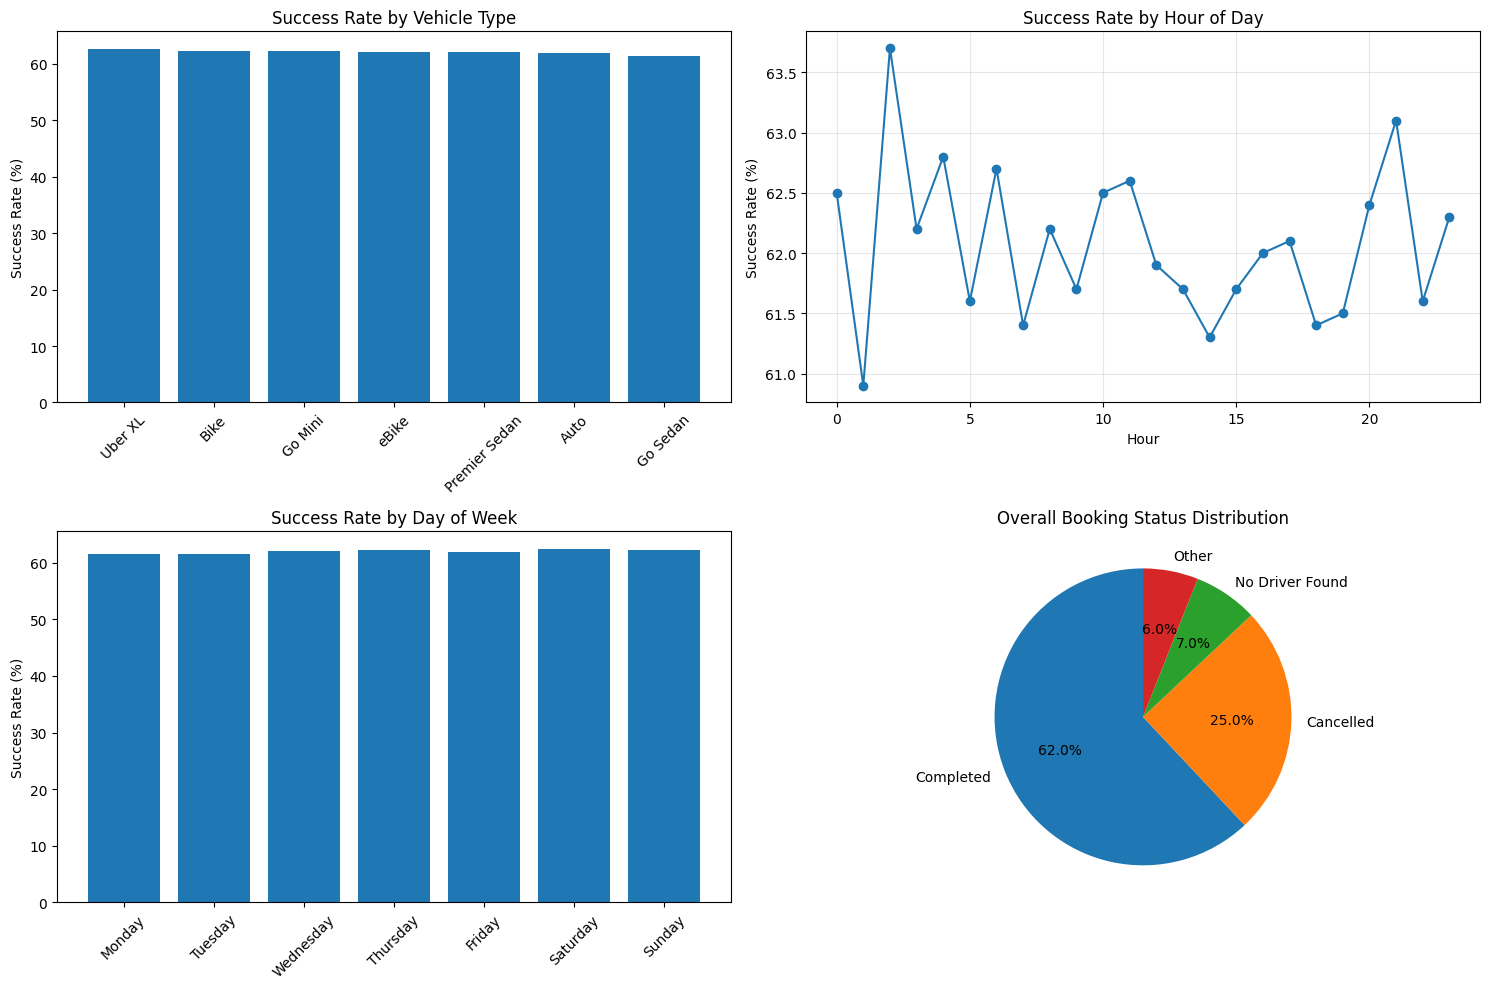

🏆 TOP PERFORMING VEHICLE TYPES:
               Total_Rides  Successful_Rides  Success_Rate
Vehicle_Type                                              
Uber XL               4449              2783         0.626
Bike                 22517             14034         0.623
Go Mini              29806             18549         0.622
eBike                10557              6551         0.621
Premier Sedan        18111             11252         0.621


In [15]:
import pandas as pd
import matplotlib.pyplot as plt


df.columns = (
    df.columns
      .str.strip()
      .str.replace(' ', '_')
      .str.replace('-', '_')
)

df['Successful'] = df['Booking_Status'] == 'Completed'


fig, axes = plt.subplots(2, 2, figsize=(15, 10))

vehicle_success = df.groupby('Vehicle_Type').agg(
    Total_Rides=('Successful', 'count'),
    Successful_Rides=('Successful', 'sum'),
    Success_Rate=('Successful', 'mean')
).round(3)

vehicle_success = vehicle_success.sort_values('Success_Rate', ascending=False)

axes[0, 0].bar(vehicle_success.index, vehicle_success['Success_Rate'] * 100)
axes[0, 0].set_title('Success Rate by Vehicle Type')
axes[0, 0].set_ylabel('Success Rate (%)')
axes[0, 0].tick_params(axis='x', rotation=45)


hourly_success = df.groupby('Hours').agg(
    Total_Rides=('Successful', 'count'),
    Successful_Rides=('Successful', 'sum'),
    Success_Rate=('Successful', 'mean')
).round(3)

axes[0, 1].plot(
    hourly_success.index,
    hourly_success['Success_Rate'] * 100,
    marker='o'
)
axes[0, 1].set_title('Success Rate by Hour of Day')
axes[0, 1].set_xlabel('Hour')
axes[0, 1].set_ylabel('Success Rate (%)')
axes[0, 1].grid(True, alpha=0.3)


daily_success = df.groupby('Day').agg(
    Total_Rides=('Successful', 'count'),
    Successful_Rides=('Successful', 'sum'),
    Success_Rate=('Successful', 'mean')
).round(3)

day_order = [
    'Monday', 'Tuesday', 'Wednesday',
    'Thursday', 'Friday', 'Saturday', 'Sunday'
]
daily_success = daily_success.reindex(day_order)

axes[1, 0].bar(daily_success.index, daily_success['Success_Rate'] * 100)
axes[1, 0].set_title('Success Rate by Day of Week')
axes[1, 0].set_ylabel('Success Rate (%)')
axes[1, 0].tick_params(axis='x', rotation=45)


status_counts = df['Status_Category'].value_counts()

axes[1, 1].pie(
    status_counts.values,
    labels=status_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
axes[1, 1].set_title('Overall Booking Status Distribution')


plt.tight_layout()
plt.show()


print("🏆 TOP PERFORMING VEHICLE TYPES:")
print(vehicle_success.head())


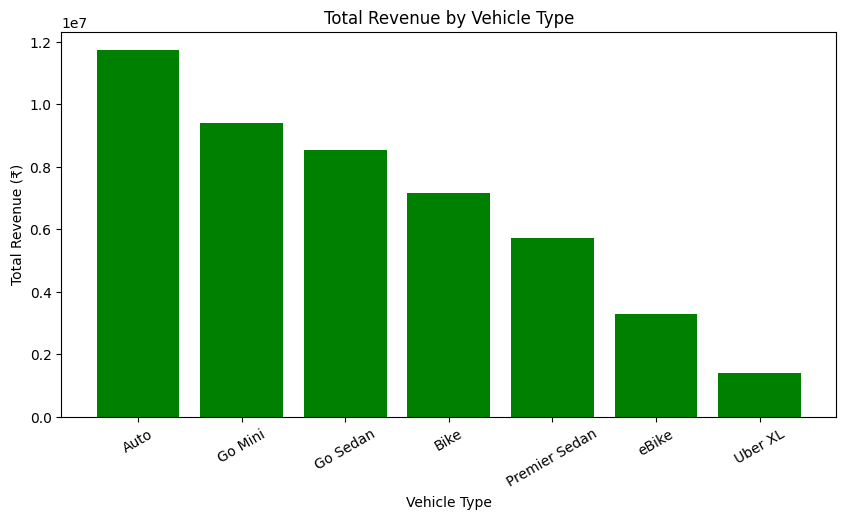

In [16]:
successful_rides = df[df['Successful'] == True]

vehicle_revenue = successful_rides.groupby('Vehicle_Type')['Booking_Value'].sum()

vehicle_revenue = vehicle_revenue.sort_values(ascending=False)

plt.figure(figsize=(10,5))
plt.bar(vehicle_revenue.index, vehicle_revenue.values, color='green')

plt.title("Total Revenue by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Total Revenue (₹)")
plt.xticks(rotation=30)

plt.show()


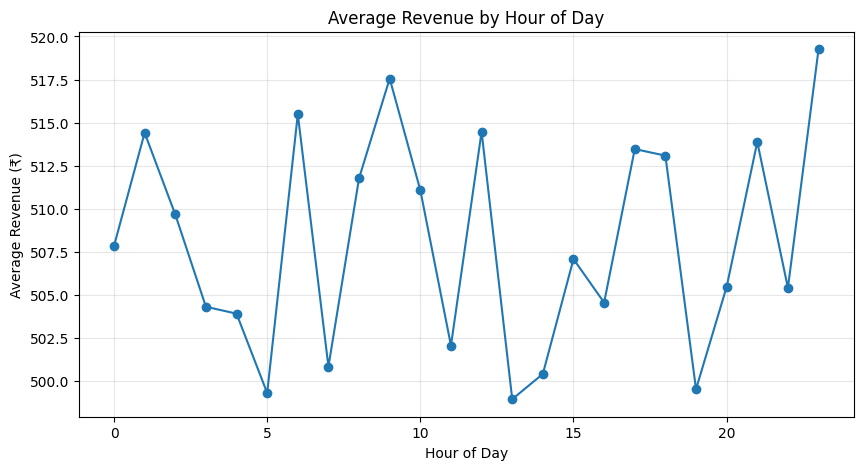

In [17]:

successful_rides = df[df["Successful"] == True]

hourly_revenue = successful_rides.groupby('Hours')['Booking_Value'].mean()


plt.figure(figsize=(10,5))
plt.plot(hourly_revenue.index, hourly_revenue.values, marker='o')

plt.title("Average Revenue by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Revenue (₹)")
plt.grid(True, alpha=0.3)

plt.show()


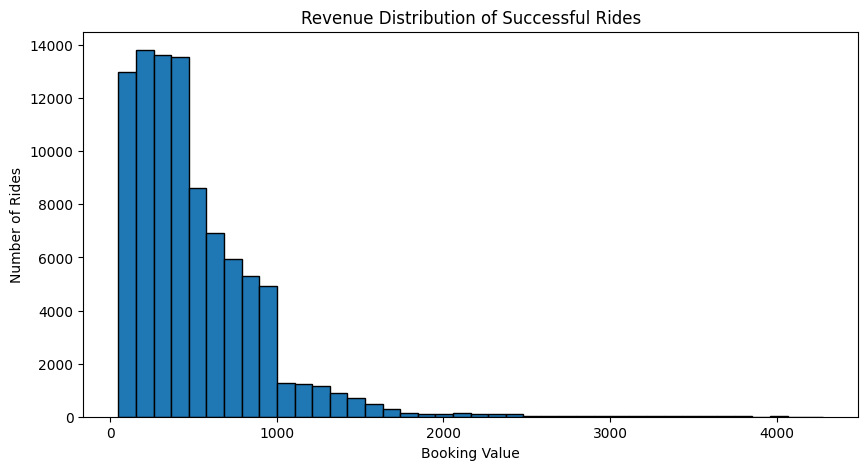

In [18]:
successful_rides = df[df['Successful'] == True]

plt.figure(figsize=(10,5))
plt.hist(successful_rides['Booking_Value'], bins=40, edgecolor='black')

plt.title("Revenue Distribution of Successful Rides")
plt.xlabel("Booking Value")
plt.ylabel("Number of Rides")

plt.show()


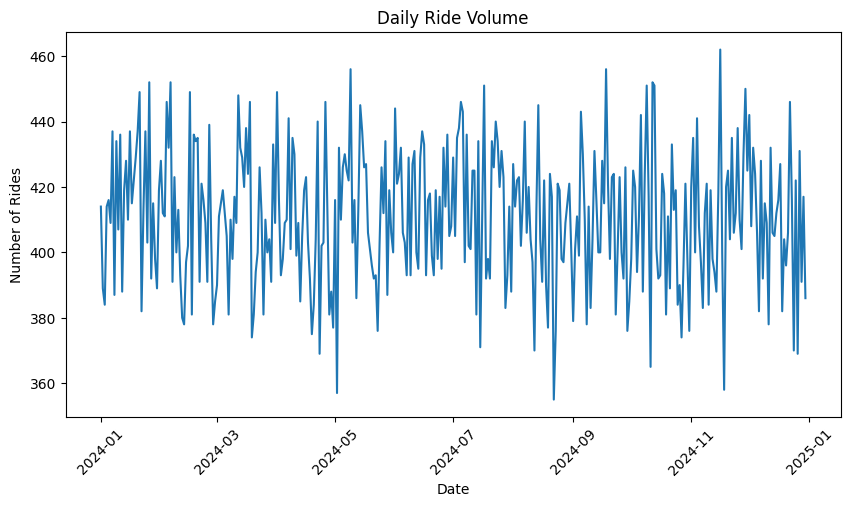

In [19]:

# Rides per day
daily_rides = df.groupby('Date').size()

# Plot
plt.figure(figsize=(10,5))
plt.plot(daily_rides.index, daily_rides.values)

plt.title("Daily Ride Volume")
plt.xlabel("Date")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)

plt.show()


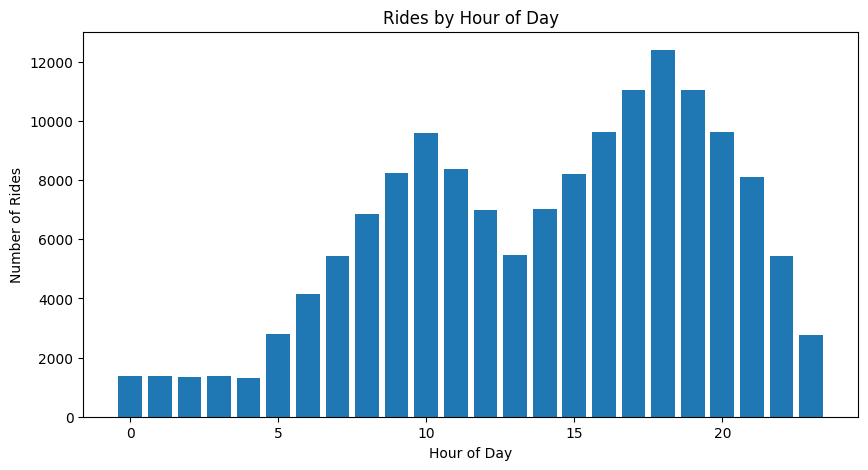

In [20]:
# Rides per hour
hourly_rides = df.groupby('Hours').size()

plt.figure(figsize=(10,5))
plt.bar(hourly_rides.index, hourly_rides.values)

plt.title("Rides by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Rides")

plt.show()


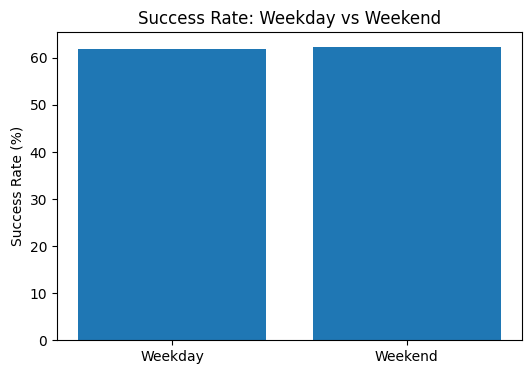

In [21]:
weekend_success = df.groupby('Weekend')['Successful'].mean() * 100

plt.figure(figsize=(6,4))
plt.bar(['Weekday', 'Weekend'], weekend_success.values)

plt.title("Success Rate: Weekday vs Weekend")
plt.ylabel("Success Rate (%)")

plt.show()


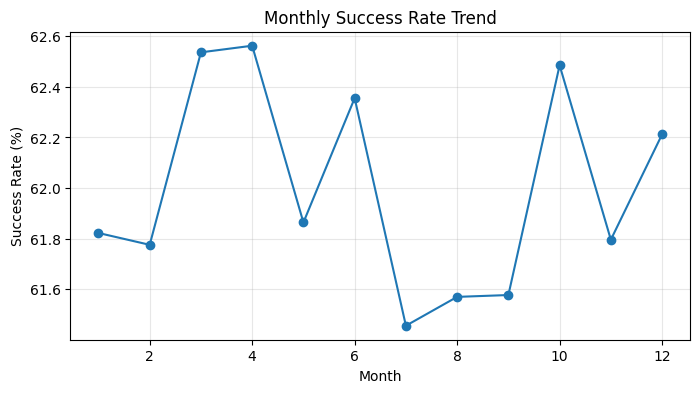

In [22]:
monthly_success = df.groupby('Month')['Successful'].mean() * 100

plt.figure(figsize=(8,4))
plt.plot(monthly_success.index, monthly_success.values, marker='o')

plt.title("Monthly Success Rate Trend")
plt.xlabel("Month")
plt.ylabel("Success Rate (%)")
plt.grid(True, alpha=0.3)

plt.show()


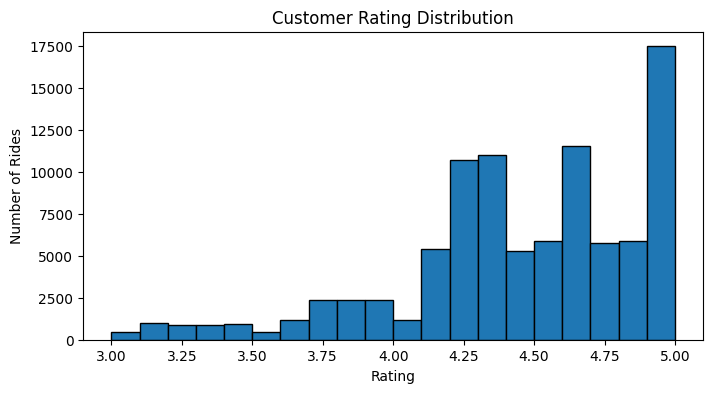

In [27]:
customer_ratings = df[df['Customer_Rating'].notna()]['Customer_Rating']

plt.figure(figsize=(8,4))
plt.hist(customer_ratings, bins=20, edgecolor='black')

plt.title("Customer Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Rides")

plt.show()


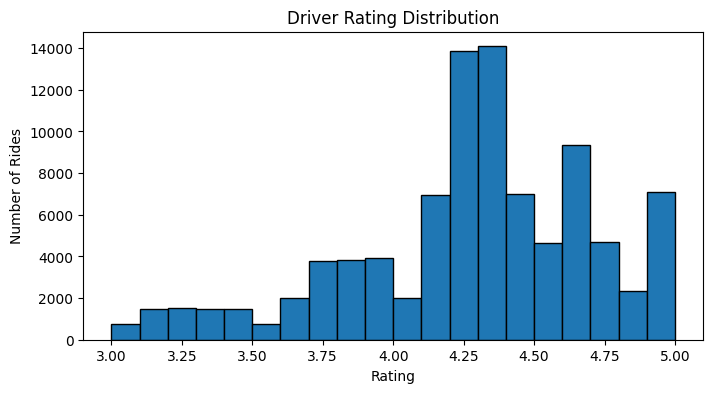

In [28]:
driver_ratings = df[df['Driver_Ratings'].notna()]['Driver_Ratings']

plt.figure(figsize=(8,4))
plt.hist(driver_ratings, bins=20, edgecolor='black')

plt.title("Driver Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Rides")

plt.show()


In [34]:
pickup_stats = df.groupby('Pickup_Location').agg(
    Total_Rides=('Successful', 'count'),
    Successful_Rides=('Successful', 'sum'),
    Success_Rate=('Successful', 'mean'),
    Avg_Revenue=('Booking_Value', 'mean')
).round(3)

pickup_stats = pickup_stats.sort_values('Total_Rides', ascending=False)
print(pickup_stats.head(10))



                  Total_Rides  Successful_Rides  Success_Rate  Avg_Revenue
Pickup_Location                                                           
Khandsa                   949               600         0.632      511.332
Barakhamba Road           946               594         0.628      518.471
Saket                     931               557         0.598      474.019
Badarpur                  921               567         0.616      521.008
Pragati Maidan            920               538         0.585      503.844
Madipur                   919               579         0.630      497.259
AIIMS                     918               562         0.612      526.225
Mehrauli                  915               574         0.627      484.948
Dwarka Sector 21          914               565         0.618      510.574
Pataudi Chowk             907               556         0.613      536.882


In [37]:
drop_stats = df.groupby('Drop_Location').agg(
    Total_Rides=('Successful', 'count'),
    Successful_Rides=('Successful', 'sum'),
    Success_Rate=('Successful', 'mean'),
    Avg_Revenue=('Booking_Value', 'mean')
).round(3)
drop_stats = drop_stats.sort_values('Total_Rides', ascending=False)
print(drop_stats.head(10))

                    Total_Rides  Successful_Rides  Success_Rate  Avg_Revenue
Drop_Location                                                               
Ashram                      936               592         0.632      480.124
Basai Dhankot               917               544         0.593      505.603
Lok Kalyan Marg             916               560         0.611      522.393
Narsinghpur                 913               574         0.629      561.840
Cyber Hub                   912               571         0.626      482.283
Kalkaji                     912               543         0.595      497.839
Kashmere Gate ISBT          909               570         0.627      485.369
Udyog Vihar                 906               564         0.623      499.350
Lajpat Nagar                904               572         0.633      523.085
Nehru Place                 902               552         0.612      489.448


In [38]:
df['Route'] = df['Pickup_Location'] + ' → ' + df['Drop_Location']

route_stats = df.groupby('Route').agg(
    Total_Rides=('Successful', 'count'),
    Successful_Rides=('Successful', 'sum'),
    Success_Rate=('Successful', 'mean'),
    Avg_Revenue=('Booking_Value', 'mean'),
    Avg_Distance=('Ride_Distance', 'mean')
).round(3)
route_stats = route_stats.sort_values('Total_Rides', ascending=False)
print(route_stats.head(10))



                                      Total_Rides  Successful_Rides  \
Route                                                                 
DLF City Court → Bhiwadi                       17                13   
Janakpuri → Faridabad Sector 15                16                 9   
Akshardham → RK Puram                          16                 7   
Vatika Chowk → Rithala                         15                 9   
Jor Bagh → Rohini East                         15                 7   
Ghaziabad → Badshahpur                         15                 6   
Rithala → Udyog Vihar Phase 4                  15                11   
Chirag Delhi → Noida Film City                 14                 7   
Vaishali → IIT Delhi                           14                 9   
New Delhi Railway Station → Shahdara           14                 9   

                                      Success_Rate  Avg_Revenue  Avg_Distance  
Route                                                              